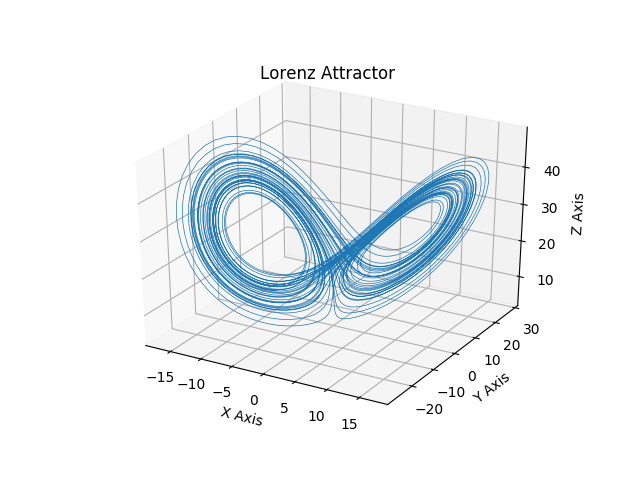

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

def lorenz(xyz, *, s=5, r=28, b=2.667):
    _, x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([1, x_dot, y_dot, z_dot])

dt = 0.01
num_steps = 30000

xyzs = np.empty((num_steps + 1, 4))  # Need one more for the initial values
xyzs[0] = (0, 0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

xyz_coords = np.empty((num_steps+1, 3))
for i in range(num_steps+1):
    xyz_coords[i] = xyzs[i][1:]

#print(xyz_coords)
    
ax.plot(*xyz_coords[25000:].T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

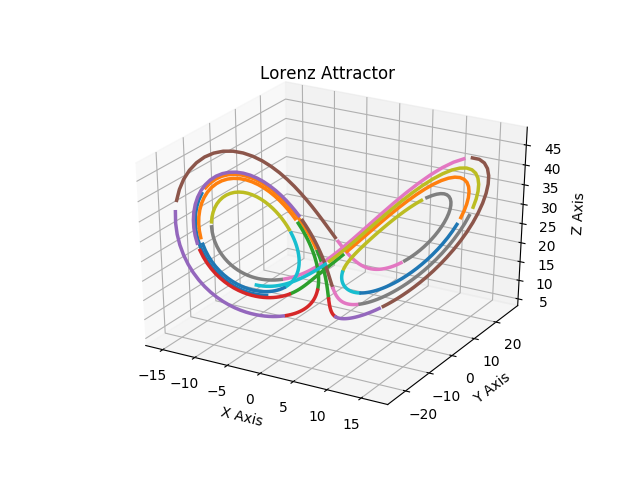

In [2]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

xyzs = xyzs[25000:]
xyz_coords = xyz_coords[25000:]
num_steps = len(xyzs)
#num_steps=num_steps-5000

traj_list = []
#num_steps=250
length = 25
i = 0
while i+length<num_steps:
    traj_list.append(xyzs[i:i+length])
    i = i+int(1*length)

ax = plt.figure().add_subplot(projection='3d')

for i in range(0,30):
    ax.plot(*xyz_coords[i*length:(i+1)*length].T, lw=2.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [ ]:
t2s = Traj2Sim()
t2s.set_trajectories(traj_list[:-2])
t2s.dist = 'mssd'

t2s.compute_mssd(verbose=True)
t2s.compute_sim(verbose=False)

print('Persistence intervals:')
pers = t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=-0.1)
pers.sort(key=lambda x: x[1][0]-x[1][1])
print(pers[:10])

gudhi.plot_persistence_diagram(pers[:20])


Custom distance between 0, 1: 8.557
Custom distance between 0, 2: 15.508
Custom distance between 0, 3: 16.419
Custom distance between 0, 4: 20.071
Custom distance between 0, 5: 32.405
Custom distance between 0, 6: 9.173
Custom distance between 0, 7: 3.195
Custom distance between 0, 8: 3.622
Custom distance between 0, 9: 7.175
Custom distance between 0, 10: 0.729
Custom distance between 0, 11: 0.858
Custom distance between 0, 12: 13.601
Custom distance between 0, 13: 9.248
Custom distance between 0, 14: 4.178
Custom distance between 0, 15: 6.646
Custom distance between 0, 16: 22.457
Custom distance between 0, 17: 33.401
Custom distance between 0, 18: 16.054
Custom distance between 0, 19: 16.363
Custom distance between 0, 20: 24.077
Custom distance between 0, 21: 24.292
Custom distance between 0, 22: 7.351
Custom distance between 0, 23: 0.46
Custom distance between 0, 24: 0.604
Custom distance between 0, 25: 16.372
Custom distance between 0, 26: 17.126
Custom distance between 0, 27: 25.2

Custom distance between 1, 27: 18.716
Custom distance between 1, 28: 19.191
Custom distance between 1, 29: 13.973
Custom distance between 1, 30: 3.282
Custom distance between 1, 31: 2.244
Custom distance between 1, 32: 6.388
Custom distance between 1, 33: 16.944
Custom distance between 1, 34: 1.866
Custom distance between 1, 35: 1.91
Custom distance between 1, 36: 14.069
Custom distance between 1, 37: 22.279
Custom distance between 1, 38: 11.746
Custom distance between 1, 39: 13.657
Custom distance between 1, 40: 1.224
Custom distance between 1, 41: 1.202
Custom distance between 1, 42: 10.188
Custom distance between 1, 43: 17.566
Custom distance between 1, 44: 15.205
Custom distance between 1, 45: 12.531
Custom distance between 1, 46: 8.463
Custom distance between 1, 47: 0.329
Custom distance between 1, 48: 3.973
Custom distance between 1, 49: 15.344
Custom distance between 1, 50: 20.827
Custom distance between 1, 51: 7.574
Custom distance between 1, 52: 7.434
Custom distance between 1

Custom distance between 2, 56: 14.253
Custom distance between 2, 57: 10.125
Custom distance between 2, 58: 1.049
Custom distance between 2, 59: 1.747
Custom distance between 2, 60: 6.83
Custom distance between 2, 61: 13.316
Custom distance between 2, 62: 11.309
Custom distance between 2, 63: 10.769
Custom distance between 2, 64: 16.695
Custom distance between 2, 65: 5.089
Custom distance between 2, 66: 7.707
Custom distance between 2, 67: 20.049
Custom distance between 2, 68: 2.769
Custom distance between 2, 69: 1.766
Custom distance between 2, 70: 10.869
Custom distance between 2, 71: 15.895
Custom distance between 2, 72: 8.768
Custom distance between 2, 73: 17.042
Custom distance between 2, 74: 2.998
Custom distance between 2, 75: 1.414
Custom distance between 2, 76: 5.641
Custom distance between 2, 77: 25.389
Custom distance between 2, 78: 5.187
Custom distance between 2, 79: 8.285
Custom distance between 2, 80: 19.69
Custom distance between 2, 81: 2.63
Custom distance between 2, 82

Custom distance between 3, 79: 10.436
Custom distance between 3, 80: 30.452
Custom distance between 3, 81: 5.956
Custom distance between 3, 82: 2.629
Custom distance between 3, 83: 8.626
Custom distance between 3, 84: 23.572
Custom distance between 3, 85: 11.564
Custom distance between 3, 86: 18.418
Custom distance between 3, 87: 14.312
Custom distance between 3, 88: 5.238
Custom distance between 3, 89: 7.774
Custom distance between 3, 90: 32.47
Custom distance between 3, 91: 8.153
Custom distance between 3, 92: 8.935
Custom distance between 3, 93: 30.674
Custom distance between 3, 94: 6.1
Custom distance between 3, 95: 3.009
Custom distance between 3, 96: 8.284
Custom distance between 3, 97: 28.484
Custom distance between 3, 98: 11.838
Custom distance between 3, 99: 17.176
Custom distance between 3, 100: 15.341
Custom distance between 3, 101: 5.868
Custom distance between 3, 102: 8.88
Custom distance between 3, 103: 25.52
Custom distance between 3, 104: 6.615
Custom distance between 3

Custom distance between 4, 110: 15.723
Custom distance between 4, 111: 10.491
Custom distance between 4, 112: 16.25
Custom distance between 4, 113: 22.785
Custom distance between 4, 114: 9.348
Custom distance between 4, 115: 8.783
Custom distance between 4, 116: 24.666
Custom distance between 4, 117: 8.905
Custom distance between 4, 118: 8.469
Custom distance between 4, 119: 23.201
Custom distance between 4, 120: 16.091
Custom distance between 4, 121: 11.174
Custom distance between 4, 122: 22.263
Custom distance between 4, 123: 13.269
Custom distance between 4, 124: 5.633
Custom distance between 4, 125: 4.794
Custom distance between 4, 126: 29.852
Custom distance between 4, 127: 15.166
Custom distance between 4, 128: 19.31
Custom distance between 4, 129: 22.314
Custom distance between 4, 130: 8.278
Custom distance between 4, 131: 7.835
Custom distance between 4, 132: 21.351
Custom distance between 4, 133: 16.995
Custom distance between 4, 134: 11.628
Custom distance between 4, 135: 22.

Custom distance between 5, 140: 24.355
Custom distance between 5, 141: 30.754
Custom distance between 5, 142: 24.469
Custom distance between 5, 143: 16.193
Custom distance between 5, 144: 12.686
Custom distance between 5, 145: 1.044
Custom distance between 5, 146: 1.194
Custom distance between 5, 147: 29.416
Custom distance between 5, 148: 35.139
Custom distance between 5, 149: 23.428
Custom distance between 5, 150: 22.565
Custom distance between 5, 151: 30.974
Custom distance between 5, 152: 24.095
Custom distance between 5, 153: 16.8
Custom distance between 5, 154: 15.809
Custom distance between 5, 155: 14.744
Custom distance between 5, 156: 1.071
Custom distance between 5, 157: 0.893
Custom distance between 5, 158: 32.13
Custom distance between 5, 159: 36.887
Custom distance between 5, 160: 23.732
Custom distance between 5, 161: 23.547
Custom distance between 5, 162: 34.472
Custom distance between 5, 163: 21.648
Custom distance between 5, 164: 19.441
Custom distance between 5, 165: 

Custom distance between 6, 172: 22.463
Custom distance between 6, 173: 2.924
Custom distance between 6, 174: 2.81
Custom distance between 6, 175: 6.759
Custom distance between 6, 176: 14.613
Custom distance between 6, 177: 11.243
Custom distance between 6, 178: 10.253
Custom distance between 6, 179: 20.437
Custom distance between 6, 180: 15.918
Custom distance between 6, 181: 18.798
Custom distance between 6, 182: 5.835
Custom distance between 6, 183: 5.699
Custom distance between 6, 184: 8.416
Custom distance between 6, 185: 10.09
Custom distance between 6, 186: 15.056
Custom distance between 6, 187: 15.011
Custom distance between 6, 188: 21.344
Custom distance between 6, 189: 3.684
Custom distance between 6, 190: 3.643
Custom distance between 6, 191: 7.17
Custom distance between 6, 192: 17.46
Custom distance between 6, 193: 12.249
Custom distance between 6, 194: 11.459
Custom distance between 6, 195: 11.642
Custom distance between 6, 196: 17.544
Custom distance between 6, 197: 18.666

Custom distance between 8, 14: 10.008
Custom distance between 8, 15: 8.829
Custom distance between 8, 16: 12.441
Custom distance between 8, 17: 23.351
Custom distance between 8, 18: 13.279
Custom distance between 8, 19: 14.589
Custom distance between 8, 20: 22.226
Custom distance between 8, 21: 17.969
Custom distance between 8, 22: 13.931
Custom distance between 8, 23: 11.731
Custom distance between 8, 24: 4.075
Custom distance between 8, 25: 5.211
Custom distance between 8, 26: 18.219
Custom distance between 8, 27: 24.957
Custom distance between 8, 28: 17.992
Custom distance between 8, 29: 14.822
Custom distance between 8, 30: 1.619
Custom distance between 8, 31: 1.55
Custom distance between 8, 32: 10.716
Custom distance between 8, 33: 9.431
Custom distance between 8, 34: 5.378
Custom distance between 8, 35: 8.204
Custom distance between 8, 36: 20.199
Custom distance between 8, 37: 22.164
Custom distance between 8, 38: 13.76
Custom distance between 8, 39: 16.816
Custom distance betwee

Custom distance between 9, 42: 8.183
Custom distance between 9, 43: 18.036
Custom distance between 9, 44: 12.633
Custom distance between 9, 45: 2.135
Custom distance between 9, 46: 7.316
Custom distance between 9, 47: 3.593
Custom distance between 9, 48: 4.104
Custom distance between 9, 49: 8.291
Custom distance between 9, 50: 10.309
Custom distance between 9, 51: 16.396
Custom distance between 9, 52: 11.522
Custom distance between 9, 53: 20.144
Custom distance between 9, 54: 8.501
Custom distance between 9, 55: 8.001
Custom distance between 9, 56: 18.783
Custom distance between 9, 57: 9.292
Custom distance between 9, 58: 5.009
Custom distance between 9, 59: 8.863
Custom distance between 9, 60: 11.978
Custom distance between 9, 61: 12.492
Custom distance between 9, 62: 13.244
Custom distance between 9, 63: 14.399
Custom distance between 9, 64: 16.31
Custom distance between 9, 65: 8.355
Custom distance between 9, 66: 12.725
Custom distance between 9, 67: 19.053
Custom distance between 9

Custom distance between 10, 77: 4.347
Custom distance between 10, 78: 17.071
Custom distance between 10, 79: 19.03
Custom distance between 10, 80: 25.581
Custom distance between 10, 81: 10.799
Custom distance between 10, 82: 11.824
Custom distance between 10, 83: 20.825
Custom distance between 10, 84: 19.315
Custom distance between 10, 85: 1.387
Custom distance between 10, 86: 0.598
Custom distance between 10, 87: 12.74
Custom distance between 10, 88: 5.977
Custom distance between 10, 89: 3.471
Custom distance between 10, 90: 3.393
Custom distance between 10, 91: 15.582
Custom distance between 10, 92: 18.376
Custom distance between 10, 93: 26.793
Custom distance between 10, 94: 8.641
Custom distance between 10, 95: 8.309
Custom distance between 10, 96: 5.573
Custom distance between 10, 97: 6.941
Custom distance between 10, 98: 18.738
Custom distance between 10, 99: 25.579
Custom distance between 10, 100: 14.132
Custom distance between 10, 101: 12.505
Custom distance between 10, 102: 19

Custom distance between 11, 110: 16.592
Custom distance between 11, 111: 18.202
Custom distance between 11, 112: 3.805
Custom distance between 11, 113: 3.776
Custom distance between 11, 114: 11.787
Custom distance between 11, 115: 23.296
Custom distance between 11, 116: 16.95
Custom distance between 11, 117: 16.369
Custom distance between 11, 118: 22.341
Custom distance between 11, 119: 4.929
Custom distance between 11, 120: 5.477
Custom distance between 11, 121: 17.294
Custom distance between 11, 122: 21.398
Custom distance between 11, 123: 15.869
Custom distance between 11, 124: 18.954
Custom distance between 11, 125: 25.554
Custom distance between 11, 126: 19.507
Custom distance between 11, 127: 17.584
Custom distance between 11, 128: 0.322
Custom distance between 11, 129: 0.212
Custom distance between 11, 130: 10.317
Custom distance between 11, 131: 22.293
Custom distance between 11, 132: 5.184
Custom distance between 11, 133: 5.832
Custom distance between 11, 134: 16.989
Custom di

Custom distance between 12, 140: 5.841
Custom distance between 12, 141: 12.1
Custom distance between 12, 142: 1.054
Custom distance between 12, 143: 1.13
Custom distance between 12, 144: 4.216
Custom distance between 12, 145: 10.35
Custom distance between 12, 146: 27.865
Custom distance between 12, 147: 11.004
Custom distance between 12, 148: 16.296
Custom distance between 12, 149: 2.443
Custom distance between 12, 150: 3.008
Custom distance between 12, 151: 12.294
Custom distance between 12, 152: 0.843
Custom distance between 12, 153: 0.91
Custom distance between 12, 154: 4.037
Custom distance between 12, 155: 9.375
Custom distance between 12, 156: 12.33
Custom distance between 12, 157: 25.208
Custom distance between 12, 158: 13.775
Custom distance between 12, 159: 17.843
Custom distance between 12, 160: 3.211
Custom distance between 12, 161: 4.162
Custom distance between 12, 162: 15.734
Custom distance between 12, 163: 0.492
Custom distance between 12, 164: 0.484
Custom distance betw

Custom distance between 13, 169: 24.36
Custom distance between 13, 170: 3.678
Custom distance between 13, 171: 3.32
Custom distance between 13, 172: 10.246
Custom distance between 13, 173: 28.186
Custom distance between 13, 174: 9.332
Custom distance between 13, 175: 11.639
Custom distance between 13, 176: 13.007
Custom distance between 13, 177: 3.338
Custom distance between 13, 178: 4.002
Custom distance between 13, 179: 21.943
Custom distance between 13, 180: 6.214
Custom distance between 13, 181: 7.336
Custom distance between 13, 182: 25.535
Custom distance between 13, 183: 7.108
Custom distance between 13, 184: 5.222
Custom distance between 13, 185: 17.095
Custom distance between 13, 186: 7.521
Custom distance between 13, 187: 4.37
Custom distance between 13, 188: 9.261
Custom distance between 13, 189: 32.644
Custom distance between 13, 190: 8.326
Custom distance between 13, 191: 8.532
Custom distance between 13, 192: 17.281
Custom distance between 13, 193: 1.832
Custom distance be

Custom distance between 15, 18: 13.973
Custom distance between 15, 19: 13.917
Custom distance between 15, 20: 17.547
Custom distance between 15, 21: 21.57
Custom distance between 15, 22: 17.075
Custom distance between 15, 23: 19.447
Custom distance between 15, 24: 4.516
Custom distance between 15, 25: 4.621
Custom distance between 15, 26: 16.166
Custom distance between 15, 27: 20.211
Custom distance between 15, 28: 22.588
Custom distance between 15, 29: 19.288
Custom distance between 15, 30: 7.211
Custom distance between 15, 31: 7.27
Custom distance between 15, 32: 11.379
Custom distance between 15, 33: 15.264
Custom distance between 15, 34: 3.178
Custom distance between 15, 35: 4.226
Custom distance between 15, 36: 16.07
Custom distance between 15, 37: 19.386
Custom distance between 15, 38: 16.663
Custom distance between 15, 39: 18.693
Custom distance between 15, 40: 3.763
Custom distance between 15, 41: 3.852
Custom distance between 15, 42: 13.35
Custom distance between 15, 43: 18.38

Custom distance between 16, 53: 4.675
Custom distance between 16, 54: 9.294
Custom distance between 16, 55: 2.424
Custom distance between 16, 56: 1.688
Custom distance between 16, 57: 13.249
Custom distance between 16, 58: 9.329
Custom distance between 16, 59: 11.567
Custom distance between 16, 60: 15.689
Custom distance between 16, 61: 23.22
Custom distance between 16, 62: 6.618
Custom distance between 16, 63: 3.696
Custom distance between 16, 64: 16.342
Custom distance between 16, 65: 4.291
Custom distance between 16, 66: 0.869
Custom distance between 16, 67: 15.14
Custom distance between 16, 68: 7.875
Custom distance between 16, 69: 7.753
Custom distance between 16, 70: 5.989
Custom distance between 16, 71: 19.19
Custom distance between 16, 72: 15.031
Custom distance between 16, 73: 23.478
Custom distance between 16, 74: 6.991
Custom distance between 16, 75: 7.558
Custom distance between 16, 76: 15.162
Custom distance between 16, 77: 27.789
Custom distance between 16, 78: 0.799
Cust

In [ ]:
verbose=False
for i in range(len(t2s.trajectories)):
    for j in range(i+1, len(t2s.trajectories)):
        #self.MSSD[i][j-i-1].set_trajectories(self.trajectories[i], self.trajectories[j])
        #t2s.dist_mat[i,j] = t2s.MSSD[i][j-i-1].inf_metric()
        t2s.dist_mat[i,j] = t2s.MSSD[i][j-i-1].t_thresh_metric(t_thresh=10)
        t2s.dist_mat[j,i] = t2s.dist_mat[i,j]
        if verbose == True:
            print('Custom distance between ' + str(i) + ', ' + str(j) + ': ' + str(t2s.dist_mat[i,j]))
t2s.compute_sim(verbose=False)

print('Persistence intervals:')
pers = t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=-0.1)
pers.sort(key=lambda x: x[1][0]-x[1][1])
print(pers[:10])

gudhi.plot_persistence_diagram(pers[:20])

In [72]:
t2s_n = Traj2Sim()
t2s_n.set_trajectories(traj_list)
t2s_n.dist = 'mssd'

t2s_n.compute_mssd(verbose=True)
t2s_n.compute_sim(verbose=False)

print('Persistence intervals:')
pers = t2s_n.simplex_tree.persistence(homology_coeff_field=2, min_persistence=-0.1)
pers.sort(key=lambda x: x[1][0]-x[1][1])
print(pers[:10])

gudhi.plot_persistence_diagram(pers[:20])


Persistence intervals:
[]


IndexError: list index out of range